In [1]:
# Run the command below if necessary, for example with Google Colab
#!pip3 install mxnet-cu110

In [2]:
# Global Libs
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd
import pickle
import random

# Seeds for reproducibility
mx.random.seed(1)
np.random.seed(1)
random.seed(1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Local libs
import model

In [3]:
# Loading data
full_house_df = pd.read_csv("kc_house_data.csv")

In [4]:
full_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Working with all features
#house_df = full_house_df[["price", "sqft_living", "bathrooms", "grade"]]
house_df = full_house_df.drop(["date", "id"], axis=1)

In [6]:
# Let's remove the outlier we found on recipe 2.1
house_df.drop(15870, inplace=True)

In [7]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Dataset Split 80/10/10
from sklearn.model_selection import train_test_split

full_train_df, test_df = train_test_split(house_df, test_size=0.2, random_state=42)

# To match correctly  10% size, we use previous size as reference
train_df, val_df = train_test_split(full_train_df, test_size=len(test_df), random_state=42)

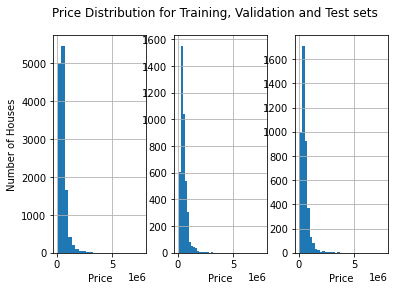

In [9]:
number_plots = 3
# In this case, matplotlib parameter sharey would not set the right scale,
# as validation and test sets are 8 time smaller
fig, axs = plt.subplots(1, number_plots, sharex = True, sharey = False)

train_df.hist(column = "price", bins = 24, ax = axs[0])
val_df.hist(column = "price", bins = 24, ax = axs[1])
test_df.hist(column = "price", bins = 24, ax = axs[2])
fig.suptitle("Price Distribution for Training, Validation and Test sets")
for i in range(number_plots):
    axs[i].set_title(None)
    axs[i].set_xlabel("Price")
axs[0].set_ylabel("Number of Houses")
plt.show()

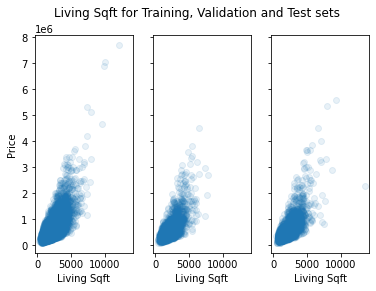

In [10]:
fig, axs = plt.subplots(1, number_plots, sharex = True, sharey = True)

axs[0].scatter(train_df["sqft_living"], train_df["price"], alpha = 0.1)
axs[1].scatter(val_df["sqft_living"], val_df["price"], alpha = 0.1)
axs[2].scatter(test_df["sqft_living"], test_df["price"], alpha = 0.1)
fig.suptitle("Living Sqft for Training, Validation and Test sets")
for i in range(number_plots):
    axs[i].set_title(None)
    axs[i].set_xlabel("Living Sqft")
axs[0].set_ylabel("Price")
plt.show()

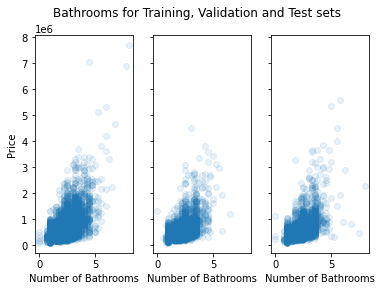

In [11]:
fig, axs = plt.subplots(1, number_plots, sharex = True, sharey = True)

axs[0].scatter(train_df["bathrooms"], train_df["price"], alpha = 0.1)
axs[1].scatter(val_df["bathrooms"], val_df["price"], alpha = 0.1)
axs[2].scatter(test_df["bathrooms"], test_df["price"], alpha = 0.1)
fig.suptitle("Bathrooms for Training, Validation and Test sets")
for i in range(number_plots):
    axs[i].set_title(None)
    axs[i].set_xlabel("Number of Bathrooms")
axs[0].set_ylabel("Price")
plt.show()

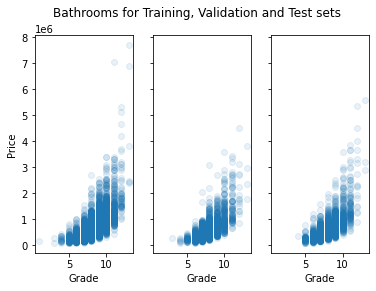

In [12]:
fig, axs = plt.subplots(1, number_plots, sharex = True, sharey = True)

axs[0].scatter(train_df["grade"], train_df["price"], alpha = 0.1)
axs[1].scatter(val_df["grade"], val_df["price"], alpha = 0.1)
axs[2].scatter(test_df["grade"], test_df["price"], alpha = 0.1)
fig.suptitle("Bathrooms for Training, Validation and Test sets")
for i in range(number_plots):
    axs[i].set_title(None)
    axs[i].set_xlabel("Grade")
axs[0].set_ylabel("Price")
plt.show()

In [13]:
print("Price Range:", house_df["price"].min(), house_df["price"].max())
print("Living Sqft Range:", house_df["sqft_living"].min(), house_df["sqft_living"].max())
print("Number of Bathrooms Range:", house_df["bathrooms"].min(), house_df["bathrooms"].max())
print("Grade Range:", house_df["grade"].min(), house_df["grade"].max())

Price Range: 75000.0 7700000.0
Living Sqft Range: 290 13540
Number of Bathrooms Range: 0.0 8.0
Grade Range: 1 13


In [14]:
# Data Preprocessing Training set
# 2 Steps:

# Step 1: One-hot encoding for Grade
# Grade goes from 1 to 13
grades_list = list(map(str, range(1, 14)))

grade_onehot_train_df_aux = pd.get_dummies(train_df.grade, prefix='', prefix_sep='')
grade_onehot_val_df_aux = pd.get_dummies(val_df.grade, prefix='', prefix_sep='')
grade_onehot_test_df_aux = pd.get_dummies(test_df.grade, prefix='', prefix_sep='')

# Not all grade values might be present in the data, so we must fill those values with 0
grade_onehot_train_df = grade_onehot_train_df_aux.T.reindex(grades_list).T.fillna(0).astype(dtype=np.float32)
grade_onehot_val_df = grade_onehot_val_df_aux.T.reindex(grades_list).T.fillna(0).astype(dtype=np.float32)
grade_onehot_test_df = grade_onehot_test_df_aux.T.reindex(grades_list).T.fillna(0).astype(dtype=np.float32)

# These one-hot values/columns will be added to the input data after scaling the other variables

In [15]:
# Grade not needed anymore
train_df = train_df.drop(["grade"], axis=1)
val_df = val_df.drop(["grade"], axis=1)
test_df = test_df.drop(["grade"], axis=1)

# Grade feature now is stored in 13 columns

In [16]:
def scale_features(features, sc = None):
    """
    Applies Standard Scaling to X, y
    returns scaled version of X,y
    """
    if not sc:
        sc = StandardScaler()
    scaled_features = sc.fit_transform(features)
    return scaled_features, sc

In [17]:
# Data Preprocessing Training set

# Step 2: Feature Scaling for Training, Validation and Testing
train_df_no_price = train_df.drop(["price"], axis=1)
val_df_no_price = val_df.drop(["price"], axis=1)
test_df_no_price = test_df.drop(["price"], axis=1)

X_train = np.array(train_df_no_price.to_numpy(), dtype=np.float32)
y_train = np.array(train_df["price"].to_numpy().reshape(-1,1), dtype=np.float32)
X_val   = np.array(val_df.drop(["price"], axis=1).to_numpy(), dtype=np.float32)
y_val   = np.array(val_df["price"].to_numpy().reshape(-1,1), dtype=np.float32)
X_test  = np.array(test_df.drop(["price"], axis=1).to_numpy(), dtype=np.float32)
y_test  = np.array(test_df["price"].to_numpy().reshape(-1,1), dtype=np.float32)

scaled_X_train, sc_X = scale_features(X_train)
scaled_y_train, sc_y = scale_features(y_train)
scaled_X_val, _ = scale_features(X_val, sc_X)
scaled_y_val, _ = scale_features(y_val, sc_y)
scaled_X_test, _ = scale_features(X_test, sc_X)
scaled_y_test, _ = scale_features(y_test, sc_y)

In [18]:
# Add One-Hot Encoding fields (no scaling for these)
scaled_X_train_df = pd.DataFrame(scaled_X_train, index=train_df_no_price.index, columns=train_df_no_price.columns)
scaled_X_val_df = pd.DataFrame(scaled_X_val, index=val_df_no_price.index, columns=val_df_no_price.columns)
scaled_X_test_df = pd.DataFrame(scaled_X_test, index=test_df_no_price.index, columns=test_df_no_price.columns)

scaled_X_train_onehot_df = pd.concat([scaled_X_train_df, grade_onehot_train_df], axis=1)
scaled_X_val_onehot_df = pd.concat([scaled_X_val_df, grade_onehot_val_df], axis=1)
scaled_X_test_onehot_df = pd.concat([scaled_X_test_df, grade_onehot_test_df], axis=1)

In [19]:
scaled_X_train_onehot_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,4,5,6,7,8,9,10,11,12,13
295,0.700497,0.498111,1.400390,0.167790,0.918016,-0.086819,-0.307305,-0.621478,1.905406,-0.655384,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3086,-1.527280,-1.454672,-1.050993,-0.238216,-0.923555,-0.086819,-0.307305,-0.621478,-1.019159,-0.271886,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6962,-0.413391,1.474502,1.761531,-0.191261,0.918016,-0.086819,-0.307305,-0.621478,2.305865,-0.655384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4249,0.700497,0.823574,1.214347,-0.234412,0.918016,-0.086819,-0.307305,-0.621478,1.699109,-0.655384,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8903,0.700497,0.498111,0.853206,-0.230366,0.918016,-0.086819,-0.307305,-0.621478,1.298650,-0.655384,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Saving data to analyse further
with open("data.pkl", "wb") as f:
    pickle.dump([X_train, y_train, X_val, y_val, X_test, y_test], f)

with open("scaled_data.pkl", "wb") as f:
    pickle.dump([scaled_X_train_onehot_df, scaled_X_val_onehot_df, scaled_X_test_onehot_df, sc_X,
                 scaled_y_train, scaled_y_val, scaled_y_test, sc_y], f)

In [21]:
# Prepare datasets to work with DataLoader
training_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_train_onehot_df.to_numpy(), scaled_y_train)
validation_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_val_onehot_df.to_numpy(), scaled_y_val)
test_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_test_onehot_df.to_numpy(), scaled_y_test)

scaled_example_input = mx.nd.array([scaled_X_train_onehot_df.values[0]])

# training_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_train, scaled_y_train)
# validation_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_val, scaled_y_val)
# test_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_test, scaled_y_test)

# scaled_example_input = mx.nd.array([scaled_X_train[0]])

In [22]:
net = model.create_regression_network()

In [23]:
# Initialization

# We need to set the context of the data, GPU in this case
# Swap comments in the next 2 lines for CPU
ctx = mx.gpu()
# ctx = mx.cpu()

net.collect_params().initialize(mx.init.MSRAPrelu(), ctx=ctx, force_reinit=True)

[03:52:42] ../src/base.cc:80: cuDNN lib mismatch: linked-against version 8101 != compiled-against version 8100.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


In [24]:
# Calculate number of trainable parameters
net.summary(scaled_example_input.as_in_context(ctx))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                                     (1, 30)               0
             Dense-1                                    (1, 128)            3968
         BatchNorm-2                                    (1, 128)             512
        Activation-3                                    (1, 128)               0
           Dropout-4                                    (1, 128)               0
             Dense-5                                   (1, 1024)          132096
         BatchNorm-6                                   (1, 1024)            4096
        Activation-7                                   (1, 1024)               0
           Dropout-8                                   (1, 1024)               0
             Dense-9                                    (1, 128)          131200
        BatchNorm-10        

In [25]:
# Training Loop, saving best model
model_file_name = "net.params"

def training_loop(loss_fn, trainer, epochs, batch_size, training_set, validation_set, ctx = mx.gpu()):
    min_val_loss = float("inf")
    
    # Returned values (use-case: plotting losses)
    training_loss, validation_loss = [], []
    
    # Iterator for Gluon data access
    training_data_iterator = mx.gluon.data.DataLoader(training_set, batch_size=batch_size, shuffle=True)
    validation_data_iterator = mx.gluon.data.DataLoader(validation_set, batch_size=batch_size, shuffle=False)
    
    num_training_batches = len(training_set) / batch_size
    num_validation_batches = len(validation_set) / batch_size

    for e in range(epochs):
                
        cumulative_loss = 0
        # inner loop
        for data, label in training_data_iterator:
            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)
            with mx.autograd.record():
                output = net(data)
                loss = loss_fn(output, label)
            loss.backward()
            trainer.step(batch_size)
            current_loss = mx.nd.mean(loss).asscalar()
            cumulative_loss += current_loss / num_training_batches
        
        # Validation Loss
        cumulative_val_loss = 0
        for data, label in validation_data_iterator:
            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)
            output = net(data)
            val_loss = loss_fn(output, label)
            current_val_loss = mx.nd.mean(val_loss).asscalar()
            cumulative_val_loss += current_val_loss / num_validation_batches
            
        added_info = ""
        if cumulative_val_loss < min_val_loss:
            added_info = " --- Updating saved model"
            min_val_loss = cumulative_val_loss
            net.save_parameters(model_file_name)
            
        desc = f"E: {e:4d}, TrL: {cumulative_loss:8.6f}, VL: {cumulative_val_loss:8.6f}" + added_info
        print(desc)
        
        # Saving loss values
        training_loss.append(cumulative_loss)
        validation_loss.append(cumulative_val_loss)
        
    return training_loss, validation_loss

In [26]:
# Define Loss Function
loss_fn = mx.gluon.loss.HuberLoss()
#loss_fn = mx.gluon.loss.L1Loss()
#loss_fn = mx.gluon.loss.L2Loss()

# Define Optimizer and Hyper Parameters
trainer = mx.gluon.Trainer(net.collect_params(), "adam", {"learning_rate": 0.01})
#trainer = mx.gluon.Trainer(net.collect_params(), "sgd", {"learning_rate": 0.001})

# Epochs & Batch Size
# Optimal values: "adam", lr: 0.01, 100 epochs, batch size 128
epochs = 200
batch_size = 128

net.collect_params().initialize(mx.init.MSRAPrelu(), ctx=ctx, force_reinit=True)

training_loss, validation_loss = training_loop(loss_fn, trainer, epochs, batch_size, training_set, validation_set, ctx)

E:    0, TrL: 0.216299, VL: 0.105190 --- Updating saved model
E:    1, TrL: 0.114229, VL: 0.087984 --- Updating saved model
E:    2, TrL: 0.106613, VL: 0.091095
E:    3, TrL: 0.097475, VL: 0.073358 --- Updating saved model
E:    4, TrL: 0.095682, VL: 0.095781
E:    5, TrL: 0.094447, VL: 0.073520
E:    6, TrL: 0.088221, VL: 0.072670 --- Updating saved model
E:    7, TrL: 0.086486, VL: 0.064848 --- Updating saved model
E:    8, TrL: 0.086593, VL: 0.063994 --- Updating saved model
E:    9, TrL: 0.084193, VL: 0.081723
E:   10, TrL: 0.083392, VL: 0.081826
E:   11, TrL: 0.085619, VL: 0.065957
E:   12, TrL: 0.083586, VL: 0.061370 --- Updating saved model
E:   13, TrL: 0.078926, VL: 0.063318
E:   14, TrL: 0.084643, VL: 0.062237
E:   15, TrL: 0.080406, VL: 0.066720
E:   16, TrL: 0.077671, VL: 0.092025
E:   17, TrL: 0.079065, VL: 0.062259
E:   18, TrL: 0.075309, VL: 0.060337 --- Updating saved model
E:   19, TrL: 0.073488, VL: 0.057444 --- Updating saved model
E:   20, TrL: 0.074976, VL: 0.06304

In [77]:
# Saving losses to analyse further
with open("losses.pkl", "wb") as f:
    pickle.dump([training_loss, validation_loss], f)